In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
import tensorflow as tf
print(tf.__version__)
import keras
print(keras.__version__)

/home/sunxin/miniconda3/envs/qinhanmin-test/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/sunxin/miniconda3/envs/qinhanmin-test/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/sunxin/miniconda3/envs/qinhanmin-test/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/sunxin/minico

1.13.2
2.2.4


Using TensorFlow backend.


In [2]:
from keras.datasets import imdb
from keras import preprocessing
from keras import models
from keras import layers
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
max_features = 10000
maxlen = 500
batch_size = 32

print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

print('Pad sequences (samples x time)')
input_train = preprocessing.sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = preprocessing.sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


In [4]:
model = models.Sequential()
model.add(layers.Embedding(max_features, 32))
model.add(layers.SimpleRNN(32))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 23s 1ms/step - loss: 0.6408 - acc: 0.6149 - val_loss: 0.5091 - val_acc: 0.7674
Epoch 2/10
20000/20000 [==============================] - 20s 1ms/step - loss: 0.4274 - acc: 0.8150 - val_loss: 0.4032 - val_acc: 0.8318
Epoch 3/10
20000/20000 [==============================] - 20s 1ms/step - loss: 0.3156 - acc: 0.8726 - val_loss: 0.3618 - val_acc: 0.8502
Epoch 4/10
20000/20000 [==============================] - 20s 1ms/step - loss: 0.2336 - acc: 0.9100 - val_loss: 0.3703 - val_acc: 0.8414
Epoch 5/10
20000/20000 [==============================] - 20s 1ms/step - loss: 0.1671 - acc: 0.9376 - val_loss: 0.3552 - val_acc: 0.8634
Epoch 6/10
20000/20000 [==============================] - 20s 1ms/step - loss: 0.1163 - acc: 0.9603 - val_loss: 0.3777 - val_acc: 0.8574
Epoch 7/1

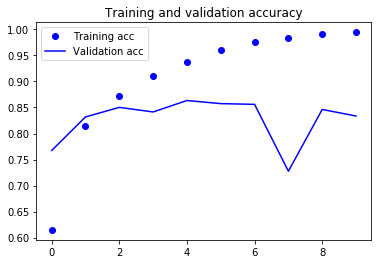

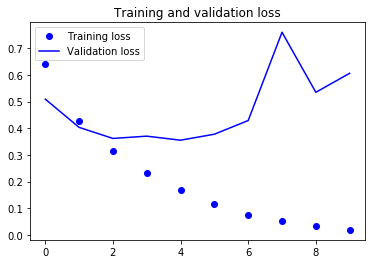

In [5]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.figure()
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [6]:
model = models.Sequential()
model.add(layers.Embedding(max_features, 32))
model.add(layers.LSTM(32))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 80s 4ms/step - loss: 0.5115 - acc: 0.7609 - val_loss: 0.4434 - val_acc: 0.7942
Epoch 2/10
20000/20000 [==============================] - 78s 4ms/step - loss: 0.2946 - acc: 0.8870 - val_loss: 0.3147 - val_acc: 0.8620
Epoch 3/10
20000/20000 [==============================] - 78s 4ms/step - loss: 0.2340 - acc: 0.9112 - val_loss: 0.3111 - val_acc: 0.8832
Epoch 4/10
20000/20000 [==============================] - 78s 4ms/step - loss: 0.1956 - acc: 0.9288 - val_loss: 0.4341 - val_acc: 0.8720
Epoch 5/10
20000/20000 [==============================] - 78s 4ms/step - loss: 0.1735 - acc: 0.9351 - val_loss: 0.2875 - val_acc: 0.8794
Epoch 6/10
20000/20000 [==============================] - 78s 4ms/step - loss: 0.1580 - acc: 0.9424 - val_loss: 0.3707 - val_acc: 0.8846
Epoch 7/10
20000/20000 [==============================] - 78s 4ms/step - loss: 0.1422 - acc: 0.9495 - val_loss: 0.3684 - val_acc:

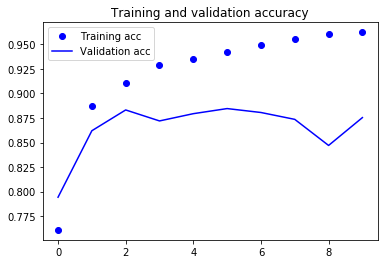

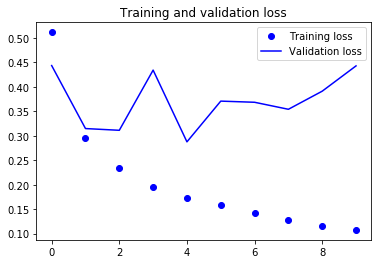

In [7]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.figure()
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()